In [1]:
import numpy as np
import requests
import pandas as pd
from cStringIO import StringIO
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


In [2]:
# DR25 no cuts
catalogHeader = "dr25_stellar_updated_feh_all"
DR25Supp = pd.read_csv("../stellarCatalogs/" + catalogHeader + ".txt")
print("the DR25 catalog has " + str(len(DR25Supp)) + " entries")




the DR25 catalog has 200038 entries


Now bring in Hardegree-Ullman 2019

In [34]:
from astropy.io import ascii


huStellarSpectral = ascii.read("stellarCatalogs/Hardegree-Ullmann_spectral.txt")
huStellarPhoto = ascii.read("stellarCatalogs/Hardegree-Ullmann_photometric.txt")

huStellarSpectral = huStellarSpectral.to_pandas();
huStellarPhoto = huStellarPhoto.to_pandas();

# load the list of stars actually used by Hardegree-Ulmann
useKepIds = np.loadtxt("stellarCatalogs/kepmidm.txt")


dropCols = list(set(huStellarSpectral) - set(huStellarPhoto))
huStellarSpectral = huStellarSpectral.drop(columns = dropCols)
stellarProps = pd.concat([huStellarSpectral, huStellarPhoto], ignore_index=True)
stellarProps['KIC'] = stellarProps['KIC'].astype(int)
stellarProps = stellarProps[stellarProps.KIC.isin(useKepIds.astype(int))]


In [35]:
len(stellarProps)

461

In [36]:
print("the DR25/HU catalog has " + str(len(stellarProps)) + " entries")


the DR25/HU catalog has 461 entries


In [37]:
thisStar = stellarProps[stellarProps.KIC == 6444896]
thisStar

,KIC,D,e_D,KsMag,e_KsMag,SpType,Teff,R*,e_R*,M*,e_M*
76,6444896,92.191,0.546,7.764,0.029,M5V,3073,0.231,0.007,0.199,0.005


In [38]:
stellarProps.SpType

0       M3.5V
1      M4.5Ve
2        M4Ve
3         M4V
4        M4Ve
5        M4Ve
6        M5Ve
7         M4V
9         M4V
10        M4V
11        M4V
12        M4V
13       M4Ve
14        M4V
16      M3.5V
17        M5V
18      M4.5V
19        M5V
21     M5.5Ve
23        M4V
25     M3.5Ve
26        M4V
27        M5V
28        M4V
29        M4V
30        M5V
32        M3V
34      M5.5V
35      M3.5V
36        M4V
        ...  
513       M5V
514       M5V
515       M4V
516       M4V
517       M5V
518       M3V
519       M4V
520       M3V
521       M4V
522       M4V
523       M4V
524       M3V
526       M3V
527       M4V
528       M3V
529       M3V
530       M3V
532       M4V
533       M3V
534       M4V
535       M3V
536       M4V
537       M3V
538       M5V
539       M4V
540       M4V
541       M3V
542       M3V
543       M4V
544       M4V
Name: SpType, Length: 461, dtype: object

In [39]:
list(DR25Supp)

['kepid',
 'tm_designation',
 'teff',
 'teff_err1',
 'teff_err2',
 'logg',
 'logg_err1',
 'logg_err2',
 'feh',
 'feh_err1',
 'feh_err2',
 'mass',
 'mass_err1',
 'mass_err2',
 'radius',
 'radius_err1',
 'radius_err2',
 'dens',
 'dens_err1',
 'dens_err2',
 'prov_sec',
 'kepmag',
 'limbdark_coeff1',
 'limbdark_coeff2',
 'limbdark_coeff3',
 'limbdark_coeff4',
 'dist',
 'dist_err1',
 'dist_err2',
 'nconfp',
 'nkoi',
 'ntce',
 'datalink_dvr',
 'st_delivname',
 'st_vet_date_str',
 'ra',
 'dec',
 'st_quarters',
 'teff_prov',
 'logg_prov',
 'feh_prov',
 'jmag',
 'jmag_err',
 'hmag',
 'hmag_err',
 'kmag',
 'kmag_err',
 'dutycycle',
 'dataspan',
 'mesthres01p5',
 'mesthres02p0',
 'mesthres02p5',
 'mesthres03p0',
 'mesthres03p5',
 'mesthres04p5',
 'mesthres05p0',
 'mesthres06p0',
 'mesthres07p5',
 'mesthres09p0',
 'mesthres10p5',
 'mesthres12p0',
 'mesthres12p5',
 'mesthres15p0',
 'rrmscdpp01p5',
 'rrmscdpp02p0',
 'rrmscdpp02p5',
 'rrmscdpp03p0',
 'rrmscdpp03p5',
 'rrmscdpp04p5',
 'rrmscdpp05p0',


In [40]:
list(stellarProps)

['KIC',
 'D',
 'e_D',
 'KsMag',
 'e_KsMag',
 'SpType',
 'Teff',
 'R*',
 'e_R*',
 'M*',
 'e_M*']

In [41]:
dr25HuStellar = pd.merge(DR25Supp, stellarProps, left_on="kepid", right_on="KIC", how="inner")
print("the DR25/HU catalog has " + str(len(dr25HuStellar)) + " entries")
# DO NOT remove the highRUWE flags

the DR25/HU catalog has 461 entries


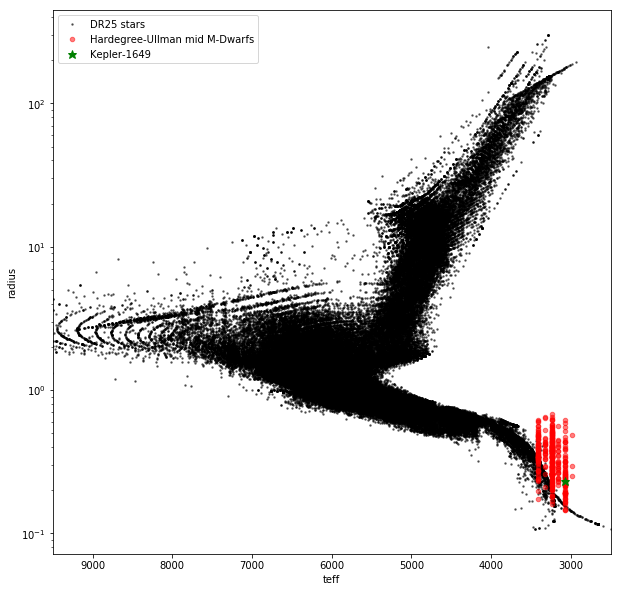

In [42]:
plt.figure(figsize=(10,10));
plt.semilogy(DR25Supp.teff, DR25Supp.radius, ".k", ms=3, alpha=0.5)
plt.semilogy(dr25HuStellar.Teff, dr25HuStellar["R*"], ".r", ms=9, alpha=0.5)
plt.semilogy(thisStar.Teff, thisStar["R*"], "*g", ms=9, alpha=1.0)
plt.xlim(9500, 2500)
plt.legend(("DR25 stars", "Hardegree-Ullman mid M-Dwarfs", "Kepler-1649"));
plt.ylabel("radius");
plt.xlabel("teff");


In [43]:
# copy the dr25 distance and radius to renamed columns in case anyone wants to compare
dr25HuStellar["teff_DR25"] = dr25HuStellar["teff"]
dr25HuStellar["teff_DR25_err1"] = dr25HuStellar["teff_err1"]
dr25HuStellar["teff_DR25_err2"] = dr25HuStellar["teff_err2"]

dr25HuStellar["logg_DR25"] = dr25HuStellar["logg"]
dr25HuStellar["logg_DR25_err1"] = dr25HuStellar["logg_err1"]
dr25HuStellar["logg_DR25_err2"] = dr25HuStellar["logg_err2"]

dr25HuStellar["mass_DR25"] = dr25HuStellar["mass"]
dr25HuStellar["mass_DR25_err1"] = dr25HuStellar["mass_err1"]
dr25HuStellar["mass_DR25_err2"] = dr25HuStellar["mass_err2"]

dr25HuStellar["mass_DR25"] = dr25HuStellar["mass"]
dr25HuStellar["mass_DR25_err1"] = dr25HuStellar["mass_err1"]
dr25HuStellar["mass_DR25_err2"] = dr25HuStellar["mass_err2"]

# copy isochrone data to the dr25 data columns

dr25HuStellar["teff"] = dr25HuStellar["Teff"]
dr25HuStellar["teff_err1"] = 0
dr25HuStellar["teff_err2"] = 0

dr25HuStellar["radius"] = dr25HuStellar["R*"]
dr25HuStellar["radius_err1"] = dr25HuStellar["e_R*"]
dr25HuStellar["radius_err2"] = -dr25HuStellar["e_R*"]

dr25HuStellar["mass"] = dr25HuStellar["M*"]
dr25HuStellar["mass_err1"] = dr25HuStellar["e_M*"]
dr25HuStellar["mass_err2"] = -dr25HuStellar["e_M*"]

# from mstar = 10.0**logg * rstar**2. / 10.0**4.437
solarLogg = 4.437
dr25HuStellar["logg"] = np.log10(dr25HuStellar["mass"]/(dr25HuStellar["radius"]**2)) + solarLogg
# should compute the following, except we never use it
dr25HuStellar["logg_err1"] = 0
dr25HuStellar["logg_err2"] = 0

# we'll leave the Gaia columns in place because they have different names
print("the dr25 HU catalog has " + str(len(dr25HuStellar)) + " entries")


dr25HuStellar.to_csv("stellarCatalogs/dr25_HU_stellar.txt", index=False)
thisStar = dr25HuStellar[dr25HuStellar.kepid == 6444896]
thisStar

the dr25 HU catalog has 461 entries


,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,e_M*,teff_DR25,teff_DR25_err1,teff_DR25_err2,logg_DR25,logg_DR25_err1,logg_DR25_err2,mass_DR25,mass_DR25_err1,mass_DR25_err2
236,6444896,2MASS J19300092+4149496,3073,0,0,5.008629,0,0,0.0,0.0,...,0.005,2703,0.0,0.0,5.274,0.0,0.0,0.096,0.0,0.0


In [44]:
# bring in Travis' catalog for comparison
travisStellar = pd.read_csv("../stellarCatalogs/GKSPC_InOut_V1.csv", dtype={"band":str})

# extract the integer kepid from the starname
iso_kepid = np.zeros((len(travisStellar),), dtype=np.int)
for i in range(len(travisStellar)):
    iso_kepid[i] = int(travisStellar["id_starname"][i][3:])

travisStellar["iso_kepid"] = iso_kepid
travisStellar = travisStellar.drop("id_starname", axis=1)

travisHuStellar = pd.merge(travisStellar, dr25HuStellar, left_on="iso_kepid", right_on="kepid", how="inner")
print("the berger2019 HU catalog has " + str(len(travisHuStellar)) + " entries")


the berger2019 HU catalog has 409 entries


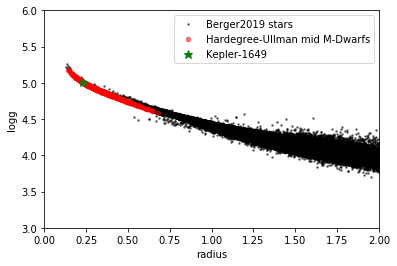

In [45]:
plt.plot(travisStellar.iso_rad, travisStellar.iso_logg, ".k", ms=3, alpha=0.5)
plt.plot(dr25HuStellar.radius, dr25HuStellar.logg, ".r", ms=9, alpha=0.5)
plt.plot(thisStar.radius, thisStar.logg, "*g", ms=9, alpha=1.0)
plt.xlim(0,2)
plt.ylim(3,6)
plt.legend(("Berger2019 stars", "Hardegree-Ullman mid M-Dwarfs", "Kepler-1649"));
plt.ylabel("logg");
plt.xlabel("radius");


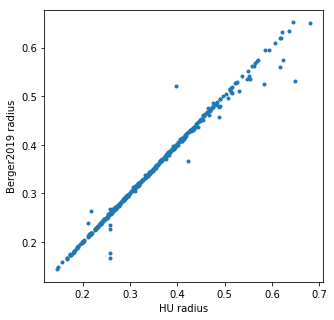

In [46]:
plt.figure(figsize=(5,5));
plt.plot(travisHuStellar.radius, travisHuStellar.iso_rad, '.')
plt.ylabel('Berger2019 radius');
plt.xlabel('HU radius');

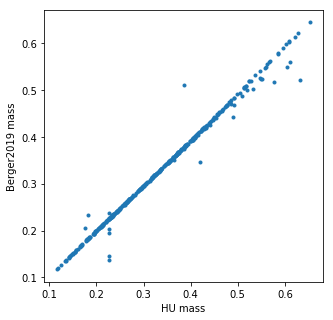

In [47]:
plt.figure(figsize=(5,5));
plt.plot(travisHuStellar.mass, travisHuStellar.iso_mass, '.')
plt.ylabel('Berger2019 mass');
plt.xlabel('HU mass');

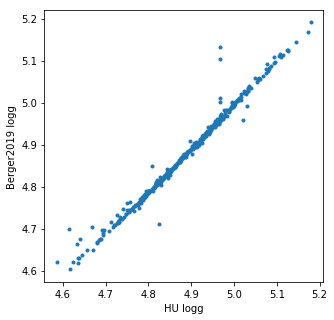

In [48]:
plt.figure(figsize=(5,5));
plt.plot(travisHuStellar.logg_y, travisHuStellar.iso_logg, '.')
plt.ylabel('Berger2019 logg');
plt.xlabel('HU logg');

In [49]:
noisyTargets = pd.read_csv("../data/DR25_DEModel_NoisyTargetList.txt", header=9)
print("there are " + str(sum(dr25HuStellar.kepid.isin(noisyTargets['# 1- Kepler ID']))) + " noisy targets")
print("this star " + str(sum(thisStar.kepid.isin(noisyTargets['# 1- Kepler ID']))) + " noisy targets")

there are 12 noisy targets
this star 0 noisy targets


In [50]:
m = np.isnan(dr25HuStellar.limbdark_coeff1) \
    | np.isnan(dr25HuStellar.limbdark_coeff2) \
    | np.isnan(dr25HuStellar.limbdark_coeff3) \
    | np.isnan(dr25HuStellar.limbdark_coeff4) 
print("there are " + str(sum(m)) + " nan limb darkening coeffs")

there are 0 nan limb darkening coeffs


In [51]:
print("there are " + str(sum(np.isnan(dr25HuStellar.dutycycle))) + " nan duty cycles")

there are 0 nan duty cycles


In [52]:
dutyCycleChange = dr25HuStellar.dutycycle - dr25HuStellar.dutycycle_post
print("there are " + str(sum(dutyCycleChange/dr25HuStellar.dutycycle > 0.3)) + " duty cycle change > 30%")
dutyCycleChange = thisStar.dutycycle - thisStar.dutycycle_post
print("this star " + str(sum(dutyCycleChange/thisStar.dutycycle > 0.3)) + " duty cycle change > 30%")

there are 14 duty cycle change > 30%
this star 0 duty cycle change > 30%


In [53]:
print("there are " + str(sum(dr25HuStellar.dutycycle < 0.6)) + " duty cycle < 60%")
print("there are " + str(sum(dr25HuStellar.dutycycle < 0.4)) + " duty cycle < 40%")
print("there are " + str(sum(dr25HuStellar.dutycycle < 0.2)) + " duty cycle < 20%")
print("this star's duty cycle: " + str(thisStar.dutycycle.values[0]))

there are 15 duty cycle < 60%
there are 5 duty cycle < 40%
there are 1 duty cycle < 20%
this star's duty cycle: 0.6981


In [54]:
print("there are " + str(sum(dr25HuStellar.dataspan < 80)) + " data span < 80 days")
print("there are " + str(sum(dr25HuStellar.dataspan < 100)) + " data span < 100 days")
print("there are " + str(sum(dr25HuStellar.dataspan < 500)) + " data span < 500 days")
print("there are " + str(sum(dr25HuStellar.dataspan < 1000)) + " data span < 1000 days")
print("this star's data span: " + str(thisStar.dataspan.values[0]))

there are 18 data span < 80 days
there are 102 data span < 100 days
there are 323 data span < 500 days
there are 329 data span < 1000 days
this star's data span: 1050.896


In [55]:
print("there are " + str(sum(dr25HuStellar.timeoutsumry != 1)) + " timeoutsumry != 1")
print("this star's timeoutsumry: " + str(thisStar.timeoutsumry.values[0]))

there are 45 timeoutsumry != 1
this star's timeoutsumry: 1.0


In [56]:
print("there are " + str(sum(np.isnan(dr25HuStellar.radius))) + " nan stellar radii")
print("this star's radius: " + str(thisStar.radius.values[0]))

there are 0 nan stellar radii
this star's radius: 0.231


In [57]:
dr25HuStellar

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,e_M*,teff_DR25,teff_DR25_err1,teff_DR25_err2,logg_DR25,logg_DR25_err1,logg_DR25_err2,mass_DR25,mass_DR25_err1,mass_DR25_err2
0,10057939,2MASS J18544245+4704318,3241,0,0,4.928720,0,0,-0.10,0.25,...,0.007,3500,110.0,-122.0,4.896,0.120,-0.080,0.370,0.089,-0.119
1,10066002,2MASS J19111998+4703333,3241,0,0,4.880960,0,0,-0.58,0.30,...,0.009,3415,125.0,-83.0,5.089,0.104,-0.127,0.189,0.102,-0.047
2,10017286,2MASS J19363979+4656591,3241,0,0,4.967869,0,0,0.00,0.00,...,0.075,3245,0.0,0.0,5.087,0.000,0.000,0.177,0.000,0.000
3,10004407,2MASS J19144573+4654501,3410,0,0,4.886890,0,0,-0.10,0.10,...,0.008,3295,52.0,-46.0,5.063,0.060,-0.055,0.195,0.046,-0.038
4,10186824,2MASS J18452961+4716542,3410,0,0,4.877996,0,0,0.02,0.10,...,0.093,3274,42.0,-32.0,5.044,0.044,-0.044,0.202,0.042,-0.026
5,10251759,2MASS J18412820+4721343,3241,0,0,4.613879,0,0,-0.10,0.10,...,0.126,3245,42.0,-22.0,5.152,0.063,-0.077,0.150,0.044,-0.024
6,10158029,2MASS J19501259+4707019,3241,0,0,4.789615,0,0,0.56,0.05,...,0.023,3856,120.0,-147.0,4.645,0.072,-0.018,0.615,0.035,-0.060
7,10274090,2MASS J19273118+4722410,3241,0,0,4.804533,0,0,0.00,0.10,...,0.010,3288,44.0,-34.0,5.033,0.044,-0.044,0.210,0.041,-0.027
8,10318386,2MASS J18432784+4727325,3241,0,0,4.820985,0,0,0.02,0.10,...,0.010,3260,44.0,-29.0,5.060,0.044,-0.044,0.191,0.039,-0.024
9,10322878,2MASS J18544900+4729219,3073,0,0,4.979064,0,0,0.04,0.25,...,0.005,3204,70.0,-44.0,5.182,0.051,-0.119,0.135,0.058,-0.015


we'll go ahead and remove the noisy targets

In [58]:
dr25HuStellar = dr25HuStellar[~dr25HuStellar.kepid.isin(noisyTargets['# 1- Kepler ID'])]
print(str(len(dr25HuStellar)) + " entries after removing noisy and nan radius targets")

449 entries after removing noisy and nan radius targets


In [59]:
dr25HuStellar.to_csv("stellarCatalogs/dr25_HU_stellar_clean.txt", index=False)


In [60]:
dr25HuStellar[dr25HuStellar.kepid == 10548114]


,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,e_M*,teff_DR25,teff_DR25_err1,teff_DR25_err2,logg_DR25,logg_DR25_err1,logg_DR25_err2,mass_DR25,mass_DR25_err1,mass_DR25_err2


In [61]:
limbDarkeningTable= pd.read_csv("../stellarCatalogs/claretBoemenTableEqn5Kepler.txt", delim_whitespace=True)

ldParams = np.transpose(np.array((limbDarkeningTable.logg.values,
                                  limbDarkeningTable.teff.values,
                                  limbDarkeningTable.feh.values)))

starParams = np.transpose(np.array((dr25HuStellar.logg.values, 
              dr25HuStellar.teff.values, 
              dr25HuStellar.feh.values)))

dr25GaiaStellar["limbdark_coeff1"] = griddata(ldParams, limbDarkeningTable.a1.values, starParams)
dr25GaiaStellar["limbdark_coeff2"] = griddata(ldParams, limbDarkeningTable.a2.values, starParams)
dr25GaiaStellar["limbdark_coeff3"] = griddata(ldParams, limbDarkeningTable.a3.values, starParams)
dr25GaiaStellar["limbdark_coeff4"] = griddata(ldParams, limbDarkeningTable.a4.values, starParams)


NameError: name 'dr25GaiaStellar' is not defined